In [1]:
# Импортируем базовые библиотеки для работы с данными и визуализации
import pandas as pd
import numpy as np
# import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Загрузим нашим данные
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Пока будем работать только с датасетом train_data. После его предобработки по аналогии сделаем предобработку для test_data

In [3]:
# Выведем информацию о нашем датасете
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
# Посмотрим на внешний вид датасета
train_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


### Наш датасет состоит из 73799 строк и 19 столбцов. В 6 столбцах строковые величины, в 1 - с плавающей точкой, в остальных - целочиленные

<AxesSubplot:>

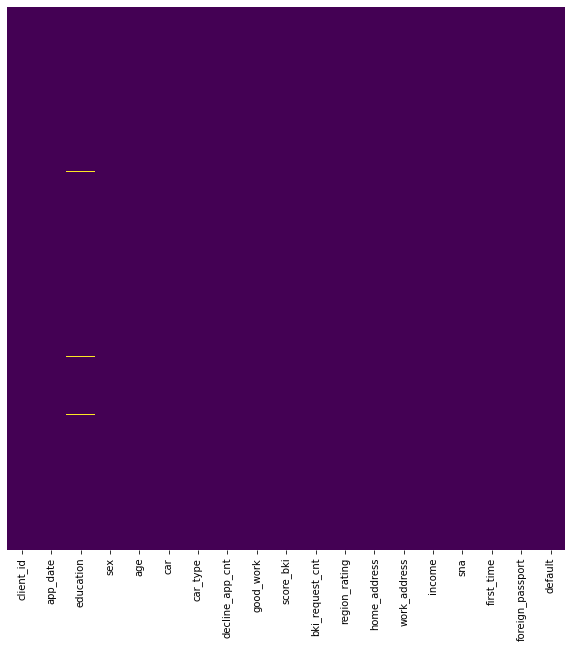

In [5]:
# Визуализируем количество пустых значений по признакам
plt.figure(figsize=(10,10))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# train_data.isnull().sum()

### Как мы видим, пустые значения в нашем датасете встречаются только в признаке 'education'

In [6]:
# Посмотрим, сколько этих значений
train_data.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [7]:
# Посмотрим на распределение уникальных значений 'education'
train_data['education'].value_counts(dropna=False)

SCH    38860
GRD    23365
UGR     9816
PGR     1257
NaN      307
ACD      194
Name: education, dtype: int64

### Мы не знаем какое в действительности образование у тех людей, у которых оно отсутствует, поэтому наиболее вероятным видится присвоить им значение 'SCH', т.к. в школе они точно учились.

In [8]:
# Присвоим значение 'SCH' тем ячейкам, в которых значение отсутствовало
train_data['education'].fillna('SCH', inplace=True)

In [9]:
# Проверим, что все пустые значения пропали
train_data.isna().sum()

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
default             0
dtype: int64

In [10]:
# Проверим, что у нас нет задублированных строк в 'client_id'
# Остальные признаки можно не проверять, т.к. по ним значения объективно могут повторяться
train_data['client_id'].duplicated().any()

False

In [11]:
num_cols = ['age', 'score_bki', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

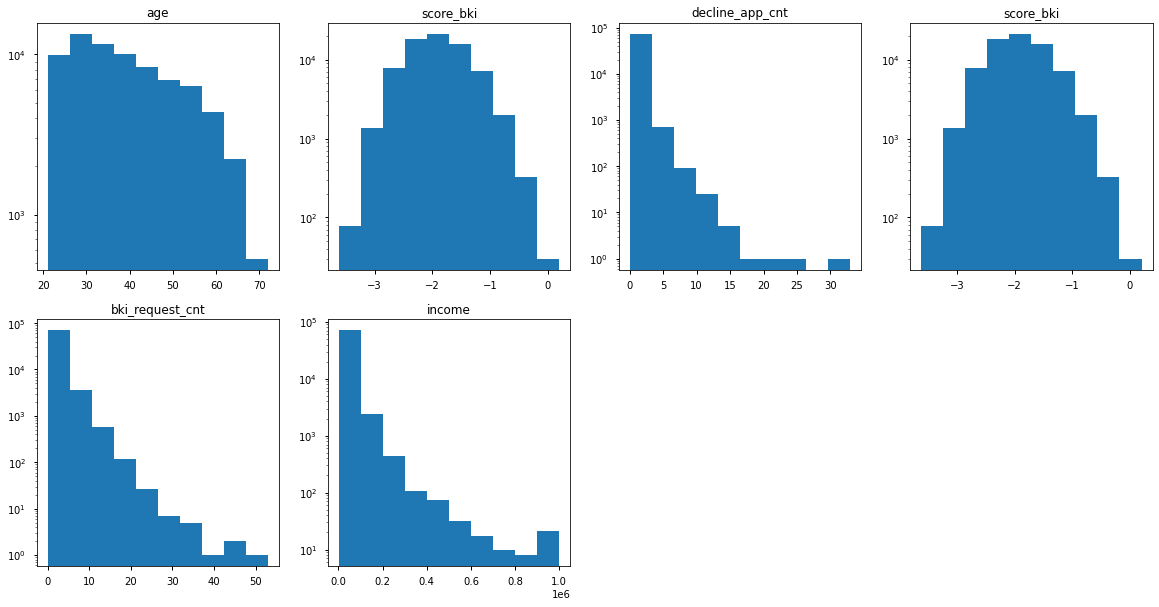

In [12]:
# Построим визуализацию распределения наших признаков
# fig, axes = plt.subplots(6, 3, figsize=(12,4))
# for i in num_cols:
#     try:
#         plt.figure()
#         plt.hist(np.log(train_data[i]))
#         plt.title(i)
#     except Exception:
#         continue
        
plt.style.use('seaborn-notebook')
plt.figure(figsize=(20,10))

for i in enumerate(num_cols):
    plt.subplot(2, 4, i[0]+1, )
    plt.title(i[1])
    plt.hist(i[1], data=train_data, log=True)

In [13]:
# Посмотрим на распределение
for i in train_data.drop(['client_id', 'app_date', 'score_bki', 'income'], axis=1).columns:
    print(train_data[i].value_counts(), end='\n')

SCH    39167
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64
F    41562
M    32237
Name: sex, dtype: int64
31    2727
28    2705
30    2693
29    2659
27    2645
26    2528
32    2501
34    2395
33    2314
35    2259
25    2202
36    2159
37    2118
38    2088
39    2082
42    1973
40    1932
24    1873
41    1857
43    1770
44    1690
23    1509
45    1487
50    1424
47    1418
46    1407
48    1404
52    1387
51    1385
53    1326
54    1326
49    1304
55    1230
56    1114
57    1040
22     937
59     925
58     881
60     851
21     849
61     661
62     576
63     477
64     449
65     422
66     309
67     248
68     165
69      81
70      32
71       3
72       2
Name: age, dtype: int64
N    49832
Y    23967
Name: car, dtype: int64
N    59791
Y    14008
Name: car_type, dtype: int64
0     61214
1      8397
2      2468
3       903
4       414
5       165
6       113
7        48
9        24
8        19
10       11
11        9
13        3
12        

In [14]:
# Теперь посмотрим на описательные статистики наших численных данных
# Больше всего нас интересуют 2, 4 и последняя строки - среднее, минимальное и максимальное значения
train_data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [15]:
train_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [16]:
type(train_data['app_date'].iloc[0])

str

In [17]:
from datetime import datetime

In [18]:
def month_to_season(x):
    if x in [12,1,2]:
        return 'winter'
    elif x in [3,4,5]:
        return 'spring'
    elif x in [6,7,8]:
        return 'summer'
    else:
        return 'fall'

In [19]:
train_data['season'] = train_data['app_date'].apply(lambda x: month_to_season(datetime.strptime(x, '%d%b%Y').month))

In [20]:
train_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,season
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,winter
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,spring
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,winter
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,winter
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,spring


In [21]:
datetime.strptime(train_data['app_date'].iloc[0], '%d%b%Y').weekday()

5

In [22]:
def weekend_or_not(x):
    if x in [0,1,2,3,4]:
        return 0
    else:
        return 1

In [23]:
train_data['weekend'] = train_data['app_date'].apply(lambda x: weekend_or_not(datetime.strptime(x, '%d%b%Y').weekday()))

In [24]:
train_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,season,weekend
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,...,50,1,2,18000,4,1,N,0,winter,1
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,...,50,2,3,19000,4,1,N,0,spring,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,...,80,1,2,30000,1,4,Y,0,winter,1
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,...,50,2,3,10000,1,3,N,0,winter,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,...,60,2,3,30000,1,4,Y,0,spring,0


In [25]:
def age_group(x):
    if x >= 60:
        return 'mature'
    elif x >= 30:
        return 'adult'
    else:
        return 'young'

In [26]:
train_data['age_group'] = train_data['age'].apply(lambda x: age_group(x))

In [27]:
# train_data['social_group'] = train_data[train_data.columns[[3, 21, 2, 8]].apply(lambda x: ','.join(x))
train_data['social_group'] = train_data[['sex', 'age_group']].apply(lambda x: ', '.join(x.astype(str)), axis=1)

In [28]:
train_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,work_address,income,sna,first_time,foreign_passport,default,season,weekend,age_group,social_group
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,...,2,18000,4,1,N,0,winter,1,mature,"M, mature"
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,...,3,19000,4,1,N,0,spring,0,adult,"F, adult"
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,...,2,30000,1,4,Y,0,winter,1,young,"M, young"
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,...,3,10000,1,3,N,0,winter,0,adult,"F, adult"
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,...,3,30000,1,4,Y,0,spring,0,adult,"M, adult"


In [29]:
train_data['social_group'].value_counts()

F, adult     29357
M, adult     22259
F, young      9023
M, young      8884
F, mature     3182
M, mature     1094
Name: social_group, dtype: int64

In [30]:
train_data.drop('social_group', axis=1, inplace=True)

In [31]:
train_data['income'].value_counts(bins=20)

(0.999, 50950.0]         60061
(50950.0, 100900.0]      10602
(100900.0, 150850.0]      1777
(150850.0, 200800.0]       646
(200800.0, 250750.0]       232
(250750.0, 300700.0]       213
(350650.0, 400600.0]        61
(450550.0, 500500.0]        57
(300700.0, 350650.0]        45
(550450.0, 600400.0]        21
(400600.0, 450550.0]        17
(950050.0, 1000000.0]       16
(650350.0, 700300.0]        14
(500500.0, 550450.0]        11
(750250.0, 800200.0]         9
(850150.0, 900100.0]         6
(900100.0, 950050.0]         5
(600400.0, 650350.0]         3
(800200.0, 850150.0]         2
(700300.0, 750250.0]         1
Name: income, dtype: int64

In [32]:
def pay_group(x):
    if x > 200_000:
        return 4 #wealthy
    elif x > 140_000:
        return 3 #upper_midclass
    elif x > 80_000:
        return 2 #midclass
    elif x > 50_000:
        return 1 #lower_midclass
    else:
        return 0 #poor

In [33]:
train_data['income_status'] = train_data['income'].apply(lambda x: pay_group(x))

In [34]:
train_data[['income', 'income_status']].head(20)

,income,income_status
0,18000,0
1,19000,0
2,30000,0
3,10000,0
4,30000,0
5,15000,0
6,28000,0
7,45000,0
8,30000,0
9,24000,0


In [35]:
train_data['income_status'].value_counts()

0    60060
1     8198
2     3477
3     1351
4      713
Name: income_status, dtype: int64

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73799 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [37]:
list(train_data.drop('client_id', axis=1).select_dtypes(exclude=[object]).columns)

['age',
 'decline_app_cnt',
 'good_work',
 'score_bki',
 'bki_request_cnt',
 'region_rating',
 'home_address',
 'work_address',
 'income',
 'sna',
 'first_time',
 'default',
 'weekend',
 'income_status']

In [38]:
features = list(train_data.drop(['client_id', 'default', 'good_work', 'weekend', 'home_address', 'work_address', 'region_rating'], axis=1).select_dtypes(exclude=[object]).columns)
list(enumerate(features))

[(0, 'age'),
 (1, 'decline_app_cnt'),
 (2, 'score_bki'),
 (3, 'bki_request_cnt'),
 (4, 'income'),
 (5, 'sna'),
 (6, 'first_time'),
 (7, 'income_status')]

### Посмотрим на выбросы

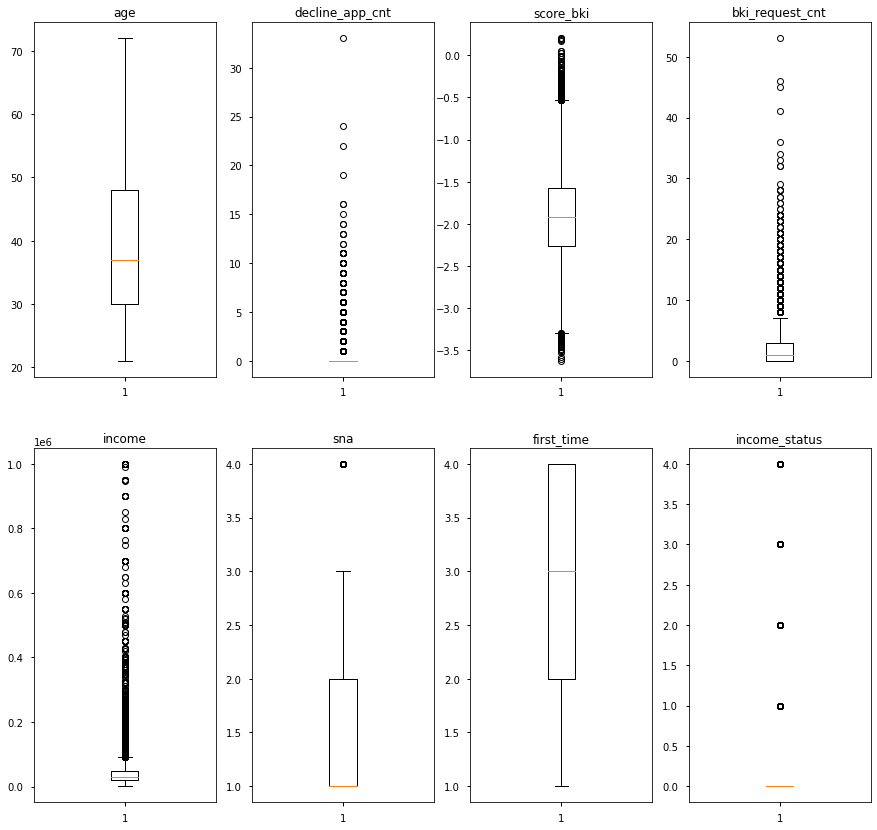

In [39]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(15,30))

for i in enumerate(features):
    plt.subplot(4, 4, i[0]+1, )
    plt.title(i[1])
    plt.boxplot(i[1], data=train_data)

### Теперь, т.к. для нашей прогнозной модели необходимы только численные значения признаков, займемся их преобразованием и нормализацией, т.к. модель Логистической Регрессии чувствительна к ненормализованным данным.

In [40]:
# Удалим колонки client_id и app_date, т.к. они нам больше не нужны
train_data.drop(['client_id', 'app_date'], axis=1, inplace=True)
train_data.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,work_address,income,sna,first_time,foreign_passport,default,season,weekend,age_group,income_status
0,SCH,M,62,Y,Y,0,0,-2.008753,1,50,...,2,18000,4,1,N,0,winter,1,mature,0
1,SCH,F,59,N,N,0,0,-1.532276,3,50,...,3,19000,4,1,N,0,spring,0,adult,0
2,SCH,M,25,Y,N,2,0,-1.408142,1,80,...,2,30000,1,4,Y,0,winter,1,young,0
3,SCH,F,53,N,N,0,0,-2.057471,2,50,...,3,10000,1,3,N,0,winter,0,adult,0
4,GRD,M,48,N,N,0,1,-1.244723,1,60,...,3,30000,1,4,Y,0,spring,0,adult,0


In [41]:
list(train_data.columns)

['education',
 'sex',
 'age',
 'car',
 'car_type',
 'decline_app_cnt',
 'good_work',
 'score_bki',
 'bki_request_cnt',
 'region_rating',
 'home_address',
 'work_address',
 'income',
 'sna',
 'first_time',
 'foreign_passport',
 'default',
 'season',
 'weekend',
 'age_group',
 'income_status']

In [42]:
# Создадим список наименований колонок для dummy переменных
dummy_cols = ['education', 'season', 'age_group']

In [43]:
# Создадим dummy переменные
train_data = pd.get_dummies(data=train_data, columns=dummy_cols)

In [44]:
train_data

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,season_spring,season_winter,age_group_adult,age_group_mature,age_group_young
0,M,62,Y,Y,0,0,-2.008753,1,50,1,...,0,0,0,1,0,0,1,0,1,0
1,F,59,N,N,0,0,-1.532276,3,50,2,...,0,0,0,1,0,1,0,1,0,0
2,M,25,Y,N,2,0,-1.408142,1,80,1,...,0,0,0,1,0,0,1,0,0,1
3,F,53,N,N,0,0,-2.057471,2,50,2,...,0,0,0,1,0,0,1,1,0,0
4,M,48,N,N,0,1,-1.244723,1,60,2,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,F,45,N,N,0,0,-1.792064,3,50,1,...,0,1,0,0,0,1,0,1,0,0
73795,M,41,Y,Y,0,0,-2.058029,1,50,2,...,0,0,0,1,0,1,0,1,0,0
73796,M,31,N,N,0,0,-1.512635,4,80,2,...,0,0,0,1,0,1,0,1,0,0
73797,F,29,N,N,0,1,-1.479334,3,50,1,...,0,0,0,1,0,0,1,0,0,1


In [45]:
# Прологарифмируем данные в колонках из списка num_cols
train_data[num_cols] = train_data[num_cols].apply(lambda x: np.log(np.abs(x+1)))

In [46]:
train_data.head()

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,season_spring,season_winter,age_group_adult,age_group_mature,age_group_young
0,M,4.143135,Y,Y,0.000000,0,0.008715,0.693147,50,1,...,0,0,0,1,0,0,1,0,1,0
1,F,4.094345,N,N,0.000000,0,-0.630593,1.386294,50,2,...,0,0,0,1,0,1,0,1,0,0
2,M,3.258097,Y,N,1.098612,0,-0.896139,0.693147,80,1,...,0,0,0,1,0,0,1,0,0,1
3,F,3.988984,N,N,0.000000,0,0.055881,1.098612,50,2,...,0,0,0,1,0,0,1,1,0,0
4,M,3.891820,N,N,0.000000,1,-1.407629,0.693147,60,2,...,0,1,0,0,0,1,0,1,0,0


In [47]:
# С помощью LabelEncoder заменить значения в бинарных колонках
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['sex', 'car', 'car_type', 'foreign_passport']:
    train_data[i] = encoder.fit_transform(train_data[i])

In [48]:
train_data.head()

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,...,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,season_spring,season_winter,age_group_adult,age_group_mature,age_group_young
0,1,4.143135,1,1,0.000000,0,0.008715,0.693147,50,1,...,0,0,0,1,0,0,1,0,1,0
1,0,4.094345,0,0,0.000000,0,-0.630593,1.386294,50,2,...,0,0,0,1,0,1,0,1,0,0
2,1,3.258097,1,0,1.098612,0,-0.896139,0.693147,80,1,...,0,0,0,1,0,0,1,0,0,1
3,0,3.988984,0,0,0.000000,0,0.055881,1.098612,50,2,...,0,0,0,1,0,0,1,1,0,0
4,1,3.891820,0,0,0.000000,1,-1.407629,0.693147,60,2,...,0,1,0,0,0,1,0,1,0,0


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               73799 non-null  int32  
 1   age               73799 non-null  float64
 2   car               73799 non-null  int32  
 3   car_type          73799 non-null  int32  
 4   decline_app_cnt   73799 non-null  float64
 5   good_work         73799 non-null  int64  
 6   score_bki         73799 non-null  float64
 7   bki_request_cnt   73799 non-null  float64
 8   region_rating     73799 non-null  int64  
 9   home_address      73799 non-null  int64  
 10  work_address      73799 non-null  int64  
 11  income            73799 non-null  float64
 12  sna               73799 non-null  int64  
 13  first_time        73799 non-null  int64  
 14  foreign_passport  73799 non-null  int32  
 15  default           73799 non-null  int64  
 16  weekend           73799 non-null  int64 

In [50]:
# Импортировать метод для стандартизации всех данных

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [51]:
# Разделим датасет на предикторы и определеяемую переменную
# Стандартизируем предикторы

train_data_y = train_data['default']

train_data.drop('default', axis=1, inplace=True)

columns = list(train_data.columns)

train_data[columns] = ss.fit_transform(train_data[columns])

In [52]:
pd.options.display.max_columns=train_data.shape[1]
train_data.head()

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,weekend,income_status,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,season_spring,season_winter,age_group_adult,age_group_mature,age_group_young
0,1.135458,1.711137,1.44194,2.065998,-0.420012,-0.444356,0.370679,-0.281005,-0.515157,-1.090749,-0.719441,-0.785016,2.017303,-1.748920,-0.419998,1.981457,-0.410715,-0.051339,-0.680646,-0.131635,0.940326,-0.391683,-1.054649,1.054649,-1.525394,4.032231,-0.566026
1,-0.880702,1.539988,-0.69351,-0.484028,-0.420012,-0.444356,-0.395839,0.772607,-0.515157,0.804527,0.730226,-0.707526,2.017303,-1.748920,-0.419998,-0.504679,-0.410715,-0.051339,-0.680646,-0.131635,0.940326,-0.391683,0.948183,-0.948183,0.655568,-0.248002,-0.566026
2,1.135458,-1.393439,1.44194,-0.484028,2.606733,-0.444356,-0.714225,-0.281005,1.782702,-1.090749,-0.719441,-0.052888,-0.652652,1.222978,2.380963,1.981457,-0.410715,-0.051339,-0.680646,-0.131635,0.940326,-0.391683,-1.054649,1.054649,-1.525394,-0.248002,1.766702
3,-0.880702,1.170400,-0.69351,-0.484028,-0.420012,-0.444356,0.427230,0.335319,-0.515157,0.804527,0.730226,-1.627419,-0.652652,0.232345,-0.419998,-0.504679,-0.410715,-0.051339,-0.680646,-0.131635,0.940326,-0.391683,-1.054649,1.054649,0.655568,-0.248002,-0.566026
4,1.135458,0.829565,-0.69351,-0.484028,-0.420012,2.250446,-1.327493,-0.281005,0.250796,0.804527,0.730226,-0.052888,-0.652652,1.222978,2.380963,-0.504679,-0.410715,-0.051339,1.469193,-0.131635,-1.063461,-0.391683,0.948183,-0.948183,0.655568,-0.248002,-0.566026


In [53]:
# Вернем в наш стандартизированный датасет поле с определяемой переменной

train_data = train_data.merge(train_data_y, left_index=True, right_index=True)

In [145]:
# Определим наши X и y для модели
X, y = train_data.drop('default', axis=1).values, train_data['default'].values

In [146]:
X, y

(array([[ 1.13545757,  1.71113664,  1.44194044, ..., -0.39168323,
          1.05464905,  4.032231  ],
        [-0.88070222,  1.5399884 , -0.69350992, ..., -0.39168323,
         -0.94818272, -0.24800166],
        [ 1.13545757, -1.39343857,  1.44194044, ..., -0.39168323,
          1.05464905, -0.24800166],
        ...,
        [ 1.13545757, -0.66507223, -0.69350992, ..., -0.39168323,
         -0.94818272, -0.24800166],
        [-0.88070222, -0.89146325, -0.69350992, ..., -0.39168323,
          1.05464905, -0.24800166],
        [ 1.13545757, -0.35072683, -0.69350992, ..., -0.39168323,
          1.05464905, -0.24800166]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

### Hold-out

In [147]:
# Импортируем метод для разбиения данных
from sklearn.model_selection import train_test_split

In [148]:
# Разобъем данные на тренировочные и тестовые. Стратифицируем выборки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [149]:
# Импортируем метод Логистической Регрессии и укажем ее параметры

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', C=100, penalty='l1')
# logreg = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', C=0.0001, penalty='l1')
# logreg = LogisticRegression(C=0.1, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=1000, multi_class='auto', n_jobs=None, penalty='l1', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [150]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [151]:
y_pred = logreg.predict(X_test)

In [152]:
from sklearn.metrics import f1_score

In [153]:
f1_score(y_test, y_pred)

0.3513586956521739

In [143]:
train_data.drop(['income_status','work_address','car_type','education_SCH','season_spring','age_group_young'], axis=1, inplace=True)

<AxesSubplot:>

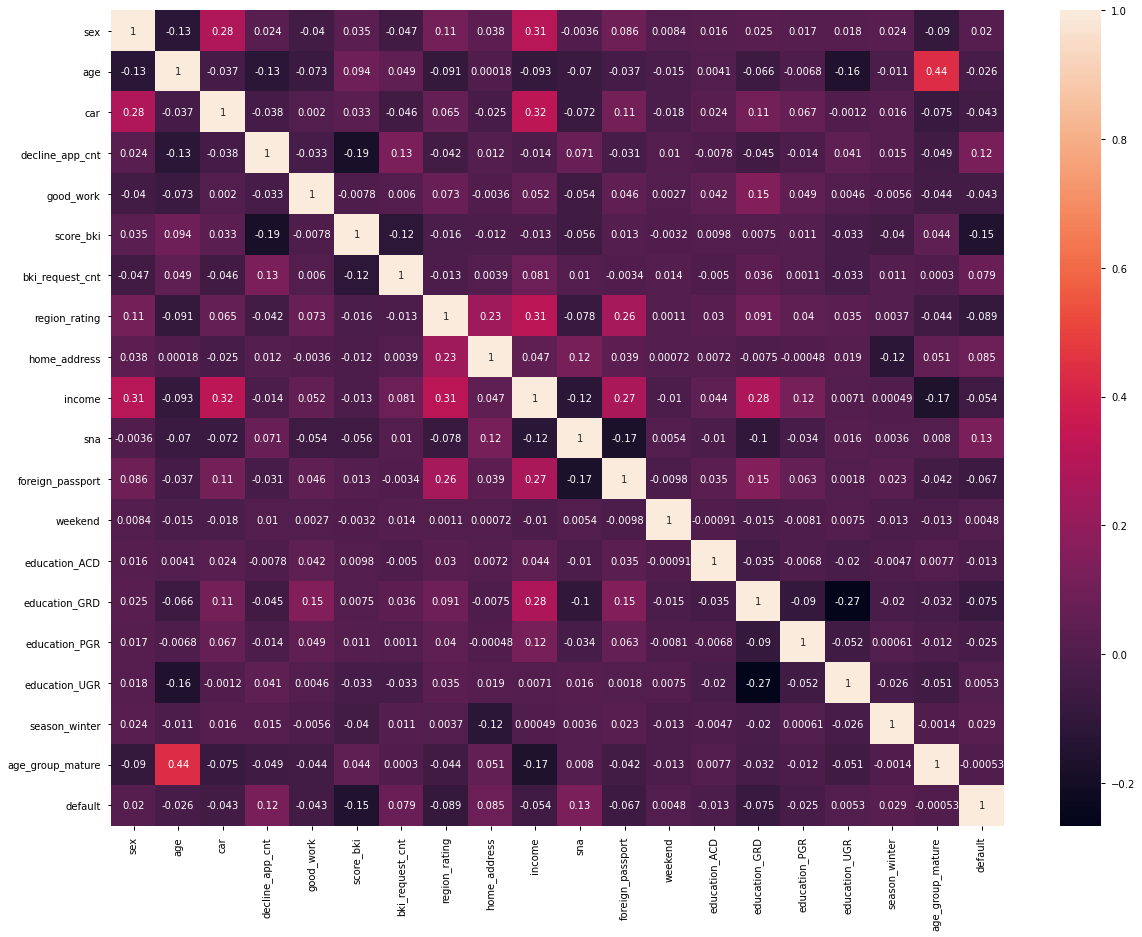

In [144]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
X, y = train_data.drop('default', axis=1).values, train_data['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
train_data.drop(['age_group_adult','first_time'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
X, y = train_data.drop('default', axis=1).values, train_data['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

In [126]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, f1_score
# f1 = make_scorer(f1_score, average='micro')

In [125]:
# grid = {'C':np.logspace(-3,3,7), 'penalty':['l1','l2'], 'solver':['liblinear']}
# grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2'], 'solver':['liblinear']}
# logreg_cv = GridSearchCV(logreg, grid, cv=10, n_jobs=-1)
# logreg_cv.fit(X_train, y_train)
# print('best parameters: ', logreg_cv.best_params_)
# print('f1: ', logreg_cv.best_score_)

In [123]:
# grid_search = GridSearchCV(logreg, grid, scoring='f1', n_jobs=-1, cv=5)

# grid_search.fit(X_train, y_train)

# mod = grid_search.best_estimator_

# best_parameters = mod.get_params()
# for param_name in sorted(best_parameters.keys()):
#     print('\t%s: %r' % (param_name, best_parameters[param_name]))

### Проделаем все те же действия для датасета test и запишем наши предсказанные значения в submission

In [154]:
test_data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [159]:
test_data['client_id'].duplicated().any()

False

In [160]:
test_data['education'].fillna('SCH', inplace=True)

test_data['season'] = test_data['app_date'].apply(lambda x: month_to_season(datetime.strptime(x, '%d%b%Y').month))

test_data['weekend'] = test_data['app_date'].apply(lambda x: weekend_or_not(datetime.strptime(x, '%d%b%Y').weekday()))

test_data['age_group'] = test_data['age'].apply(lambda x: age_group(x))

test_data['income_status'] = test_data['income'].apply(lambda x: pay_group(x))

test_data.drop(['client_id', 'app_date'], axis=1, inplace=True)

test_data = pd.get_dummies(data=test_data, columns=dummy_cols)

test_data[num_cols] = test_data[num_cols].apply(lambda x: np.log(np.abs(x+1)))

for i in ['sex', 'car', 'car_type', 'foreign_passport']:
    test_data[i] = encoder.fit_transform(test_data[i])

columns = list(test_data.columns)

test_data[columns] = ss.fit_transform(test_data[columns])

test_data.drop(['income_status','work_address','car_type','education_SCH','season_spring','age_group_young','age_group_adult','first_time'], axis=1, inplace=True)

predict_submission = logreg.predict(test_data.values)

In [161]:
predict_submission

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [164]:
sample_submission.default.unique()

array([0], dtype=int64)

In [165]:
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,0
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0
